<a href="https://colab.research.google.com/github/JungWooJang0324/ReviewReaders/blob/main/MachineLearningProblem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning 과제-2**  
**┗ ✅ 자동차 주행 중 장애물 종류 예측 모델**
---

## **🔒문제설명**
---
* **제시된 데이터를 이용하여 장애물의 종류를 예측하는 모델을 만드세요.**

> **주어진 상황**

```
·달리는 자동차의 가속도 센서를 장착하여 장애물을 마주칠 때까지 주행
·가속도 센서 값을 바탕으로 장애물 종류가 무엇인지 판단하는 모델
·센서 값의 특성을 파악할 수 있도록 각종 통계값을 Model 입력으로 사용 (제공)

```
> **문제**

```
Q1. 주어진 가속도 센서 값을 이용하여 장애물 종류를 예측하는 모델 생성
```


> **예상 Output**

```
(1) 센서 데이터를 입력값으로 받을 수 있는 모델 생성
(2) 센서 데이터를 입력할 수 있는 인터페이스 구성 및 입력된 Feature를 이용하여
 장애물 종류를 확률 값으로 출력할 수 있는 구성

```  
Input 예제

|가속도센서_T1|가속도센서_T2|...|
|:---:|:---:|:---:|
|0.123122|1.212321|...|
|0.123123|2.132411|...|

Output 예제

|가속도센서_T1|가속도센서_T2|...|결과|
|:---:|:---:|:---:|:---:|
|0.123122|1.212321|...|raised_crosswalk|
|0.123123|2.132411|...|raised_marker|

In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/머신러닝 100제/data')
# '과제 파일이 위치한 경로를 입력'
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/00.fast_campus/00.HyperDifference/머신러닝 100제/data'

In [ ]:
# ▶ Data read (※ 추가 수정 없이, 상위 단계에서 경로 설정 후 실행)
import pandas as pd
import numpy as np
train_df = pd.read_csv('problem2/train.csv', header=None)
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
0,0.079950,0.401908,0.615054,-0.001974,0.702012,0.311699,1.235302,0.515019,0.530226,-0.060397,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
1,0.085236,1.784302,-0.911574,-0.567213,1.240399,-0.965066,-0.712931,-0.256862,-0.957942,-0.746258,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
2,-0.635592,-0.979394,-1.515084,1.357745,-0.295452,1.904030,-0.871937,0.117619,-1.672553,-0.518026,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
3,0.825253,0.850243,0.204219,0.337640,-1.395537,0.233754,0.984652,-0.874179,0.600938,-1.410768,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
4,-0.039025,2.295728,-1.737920,0.182654,1.158145,-1.742428,0.580543,0.039800,-0.649687,0.838721,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
5,0.227181,-1.044731,0.832970,-0.091296,-0.416593,-0.114726,-0.456424,-0.375342,0.596528,0.336534,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
6,0.200866,0.478644,0.185785,0.031427,-0.950392,-0.176966,0.473113,0.644518,0.661428,-0.021672,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
7,-0.458575,-0.020511,0.564279,-0.885526,0.982523,-0.160406,-0.076616,0.833781,-0.408216,0.467229,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
8,-0.062659,0.155572,-0.063122,-0.674609,-0.065685,0.148293,-0.553120,0.055116,-0.260181,-0.448672,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
9,0.039534,-0.268711,-0.324227,-0.111280,0.284105,0.224802,-0.557076,0.326446,0.200025,-0.198838,...,?,?,?,?,?,?,?,?,?,raised_crosswalk


In [ ]:
# ▶ Data preprocessing code 제공
# 아래 코드를 이용해서 데이터 전처리 후 모델링하세요.

In [ ]:
train_X = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]

In [ ]:
from scipy.stats import *
def feature_extractor(record): # 행마다 적용
    record = record[record != "?"].astype(float)
    record_mean = record.mean()
    record_std = record.std()
    record_skew = skew(record)
    record_kurtosis = kurtosis(record)

    return [record_mean, record_std, record_skew, record_kurtosis]

In [ ]:
train_X_val = train_X.apply(feature_extractor, axis = 1).tolist()
train_X = pd.DataFrame(train_X_val,
                       columns = ['mean', 'std', 'skew', 'kurtosis'])

In [ ]:
# ▶ Multiclass classification 알고리즘을 이용해서 모델 학습을 진행하세요.
# 모델링에 정답은 없습니다. 어떤 방법이든 편하게 시도해보세요!

## **🔑Multiclass classification 풀이**
---
> **Support Vector Machine 활용 가이드**



### **🔻데이터 입력**  
* 머신러닝 문제에서는 데이터의 전처리가 모두 되었다는 전제로 진행  
```
  (1) from pandas import read_csv
  (2) from sklearn.model_selection import train_test_split
```

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('problem2/train.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,727,728,729,730,731,732,733,734,735,736
0,0.079950,0.401908,0.615054,-0.001974,0.702012,0.311699,1.235302,0.515019,0.530226,-0.060397,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
1,0.085236,1.784302,-0.911574,-0.567213,1.240399,-0.965066,-0.712931,-0.256862,-0.957942,-0.746258,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
2,-0.635592,-0.979394,-1.515084,1.357745,-0.295452,1.904030,-0.871937,0.117619,-1.672553,-0.518026,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
3,0.825253,0.850243,0.204219,0.337640,-1.395537,0.233754,0.984652,-0.874179,0.600938,-1.410768,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
4,-0.039025,2.295728,-1.737920,0.182654,1.158145,-1.742428,0.580543,0.039800,-0.649687,0.838721,...,?,?,?,?,?,?,?,?,?,raised_crosswalk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,-0.006228,0.323253,-0.818177,0.455612,0.029037,0.880774,0.242928,0.311159,-0.594183,-0.078379,...,?,?,?,?,?,?,?,?,?,vertical_patch
386,-0.525968,-0.270345,-0.177907,-0.568287,-1.371923,-1.592449,0.133313,-1.738330,0.251442,0.765196,...,?,?,?,?,?,?,?,?,?,vertical_patch
387,-0.598992,-0.699259,-2.126619,-1.499914,-1.666046,0.467750,0.074635,-0.362740,-0.400024,0.207959,...,?,?,?,?,?,?,?,?,?,vertical_patch
388,-0.277607,0.820614,-0.395713,0.726456,0.127812,0.522827,-0.815681,-0.370570,0.438941,0.110596,...,?,?,?,?,?,?,?,?,?,vertical_patch


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
train_X_val = X.apply(feature_extractor, axis = 1).tolist()
X = pd.DataFrame(train_X_val,
                       columns = ['mean', 'std', 'skew', 'kurtosis'])

### **🔻모델 학습 및 성능 확인**  
* 머신러닝 문제에서는 데이터의 전처리가 모두 되었다는 전제로 진행  
```
  (1) from sklearn.linear_model import LogisticRegression
  (2) from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
```

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import *

model = SVC().fit(X, y)

In [ ]:
# ▶ Test data 로딩
test_df = pd.read_csv('problem2/test.csv', header=None)
test_X = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]
test_X_val = test_X.apply(feature_extractor, axis = 1).tolist()
test_X = pd.DataFrame(test_X_val,
                       columns = ['mean', 'std', 'skew', 'kurtosis'])
pred_Y = model.predict(test_X)

print(accuracy_score(test_y, pred_Y))

0.47058823529411764


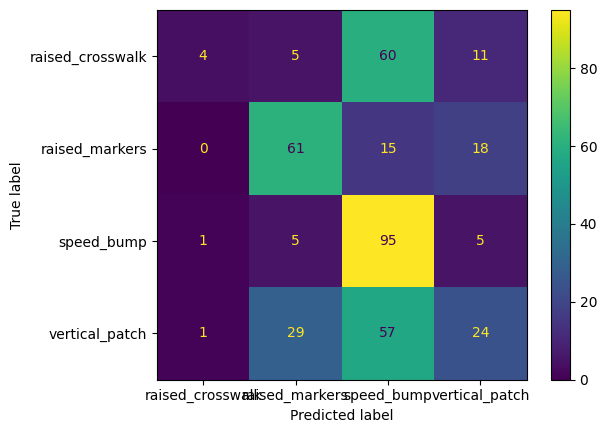

In [ ]:
y_pred = model.predict(test_X)

cm = confusion_matrix(test_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()